In [1]:
import sys
sys.path.append('/nfs/homedirs/giri/masterthesis')

In [2]:
import torch
import os
from sklearn.metrics import precision_recall_curve,auc,roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt
from textwrap import wrap
from pylab import rcParams
from PIL import Image
from IPython.display import display
from robust_priornet.eval.uncertainty import UncertaintyMeasuresEnum

In [7]:
model_dir="runtime-model-vgg6-50epochs"
batch_size=64
n_in=28
num_channels=1
data_dir="./runtime-data"
in_dataset="MNIST"

## Misclassify detect task (only In domain dataset) evaluation (CPU)
#### For GPU eval, use seml script eval_seml.py
Label = 1 is a misclassified sample

Label = 0 is a correctly classified sample

In [4]:
out_dir=model_dir+"/eval"

In [5]:
cmd = f"python -m robust_priornet.eval_priornet --gpu -1 --model_dir {model_dir} --result_dir {out_dir} --task misclassification_detect --batch_size {batch_size} {data_dir} {in_dataset} OMNIGLOT"
print(cmd)

python -m robust_priornet.eval_priornet --gpu -1 --model_dir runtime-model-vgg6-50epochs-robust-dentropy --result_dir runtime-model-vgg6-50epochs-robust-dentropy/eval --task misclassification_detect --batch_size 64 ./runtime-data MNIST OMNIGLOT


In [6]:
os.system(cmd)

0

## OOD Detect task (Both In-domain and OOD dataset) evaluation (CPU)
#### For GPU eval, use seml script eval_seml.py

Label = 1 is a out of distribution sample

Label = 0 is a in distribution sample

In [7]:
ood_dataset="CIFAR10"
out_dir=model_dir+"/ood-eval-cifar10"

In [8]:
cmd = f"python -m robust_priornet.eval_priornet --gpu -1 --batch_size {batch_size} --task ood_detect --model_dir {model_dir} --result_dir {out_dir} {data_dir} {in_dataset} {ood_dataset}"
print(cmd)

python -m robust_priornet.eval_priornet --gpu -1 --batch_size 64 --task ood_detect --model_dir runtime-model-vgg6-50epochs --result_dir runtime-model-vgg6-50epochs/ood-eval-cifar10 ./runtime-data MNIST CIFAR10


In [9]:
os.system(cmd)

0

## OOD Detection - confidence

In [10]:
def display_pr_roc_curves(model_dir, eval_dir, uncertainty_measure: UncertaintyMeasuresEnum):
    #figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,20))
    img = Image.open(os.path.join(model_dir, eval_dir, f'{uncertainty_measure._value_}_PR_Curve.png'))
    display(img)
    img = Image.open(os.path.join(model_dir, eval_dir, f'{uncertainty_measure._value_}_ROC_Curve.png'))
    display(img)

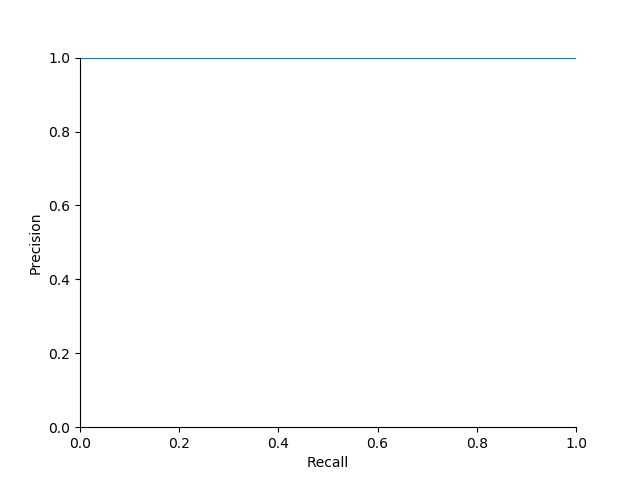

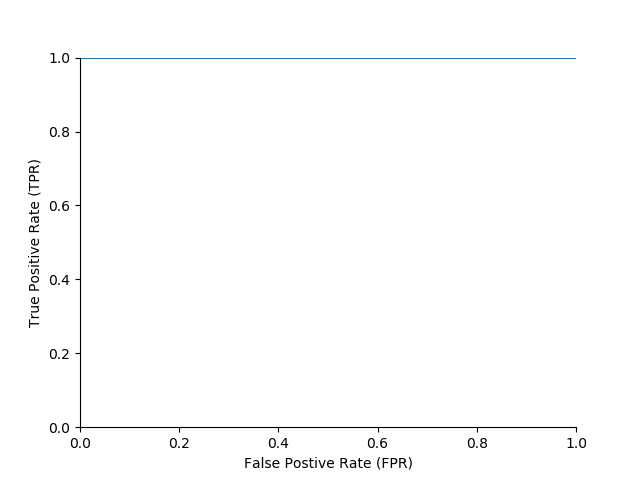

In [11]:
display_pr_roc_curves(model_dir, 'ood-eval', UncertaintyMeasuresEnum.CONFIDENCE)

In [14]:
# VGG6 Model's evaluation results for ood detect task - against OMNIGLOT (ood dataset used in training)
with open(f'{model_dir}/ood-eval/results.txt', 'r') as f:
    print(f.read())

Classification Error: 0.6 
NLL: 4.020999908447266 
AUPR using confidence: 100.0
AUROC using confidence: 100.0
AUPR using total_uncertainty: 100.0
AUROC using total_uncertainty: 100.0
AUPR using expected_data_uncertainty: 100.0
AUROC using expected_data_uncertainty: 100.0
AUPR using distributional_uncertainty: 66.7
AUROC using distributional_uncertainty: 100.0
AUPR using differential_entropy: 100.0
AUROC using differential_entropy: 100.0



In [4]:
# VGG6 Model's evaluation results for ood detect task - against SVHN (ood dataset not seen during training)
with open(f'{model_dir}/ood-eval-svhn/results.txt', 'r') as f:
    print(f.read())

Classification Error: 0.6 
NLL: 4.020999908447266 
AUPR using confidence: 100.0
AUROC using confidence: 100.0
AUPR using total_uncertainty: 100.0
AUROC using total_uncertainty: 100.0
AUPR using expected_data_uncertainty: 100.0
AUROC using expected_data_uncertainty: 100.0
AUPR using distributional_uncertainty: 99.9
AUROC using distributional_uncertainty: 99.9
AUPR using differential_entropy: 100.0
AUROC using differential_entropy: 100.0



In [5]:
# VGG6 Model's evaluation results for ood detect task - against CIFAR-10 (ood dataset not seen during training)
with open(f'{model_dir}/ood-eval-cifar10/results.txt', 'r') as f:
    print(f.read())

Classification Error: 0.6 
NLL: 4.020999908447266 
AUPR using confidence: 100.0
AUROC using confidence: 100.0
AUPR using total_uncertainty: 100.0
AUROC using total_uncertainty: 100.0
AUPR using expected_data_uncertainty: 100.0
AUROC using expected_data_uncertainty: 100.0
AUPR using distributional_uncertainty: 99.9
AUROC using distributional_uncertainty: 100.0
AUPR using differential_entropy: 100.0
AUROC using differential_entropy: 100.0



## Misclassification Detection - confidence

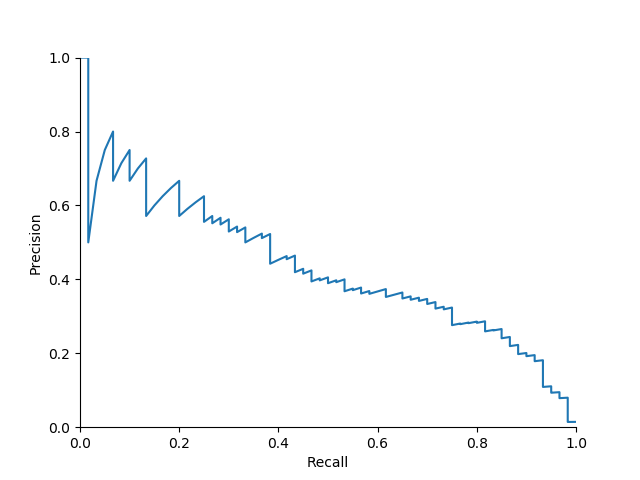

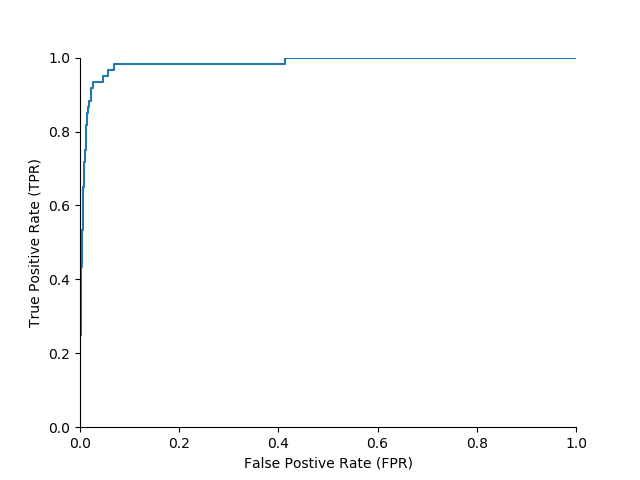

In [12]:
display_pr_roc_curves(model_dir, 'eval', UncertaintyMeasuresEnum.CONFIDENCE)

In [13]:
# VGG6 Model's evaluation results for misclassification task
with open(f'{model_dir}/eval/results.txt', 'r') as f:
    print(f.read())

Classification Error: 0.6 
NLL: 4.020999908447266 
AUPR using confidence: 43.1
AUROC using confidence: 98.5
AUPR using total_uncertainty: 35.0
AUROC using total_uncertainty: 98.3
AUPR using expected_data_uncertainty: 36.0
AUROC using expected_data_uncertainty: 98.4
AUPR using distributional_uncertainty: 29.3
AUROC using distributional_uncertainty: 97.7
AUPR using differential_entropy: 29.2
AUROC using differential_entropy: 98.0

